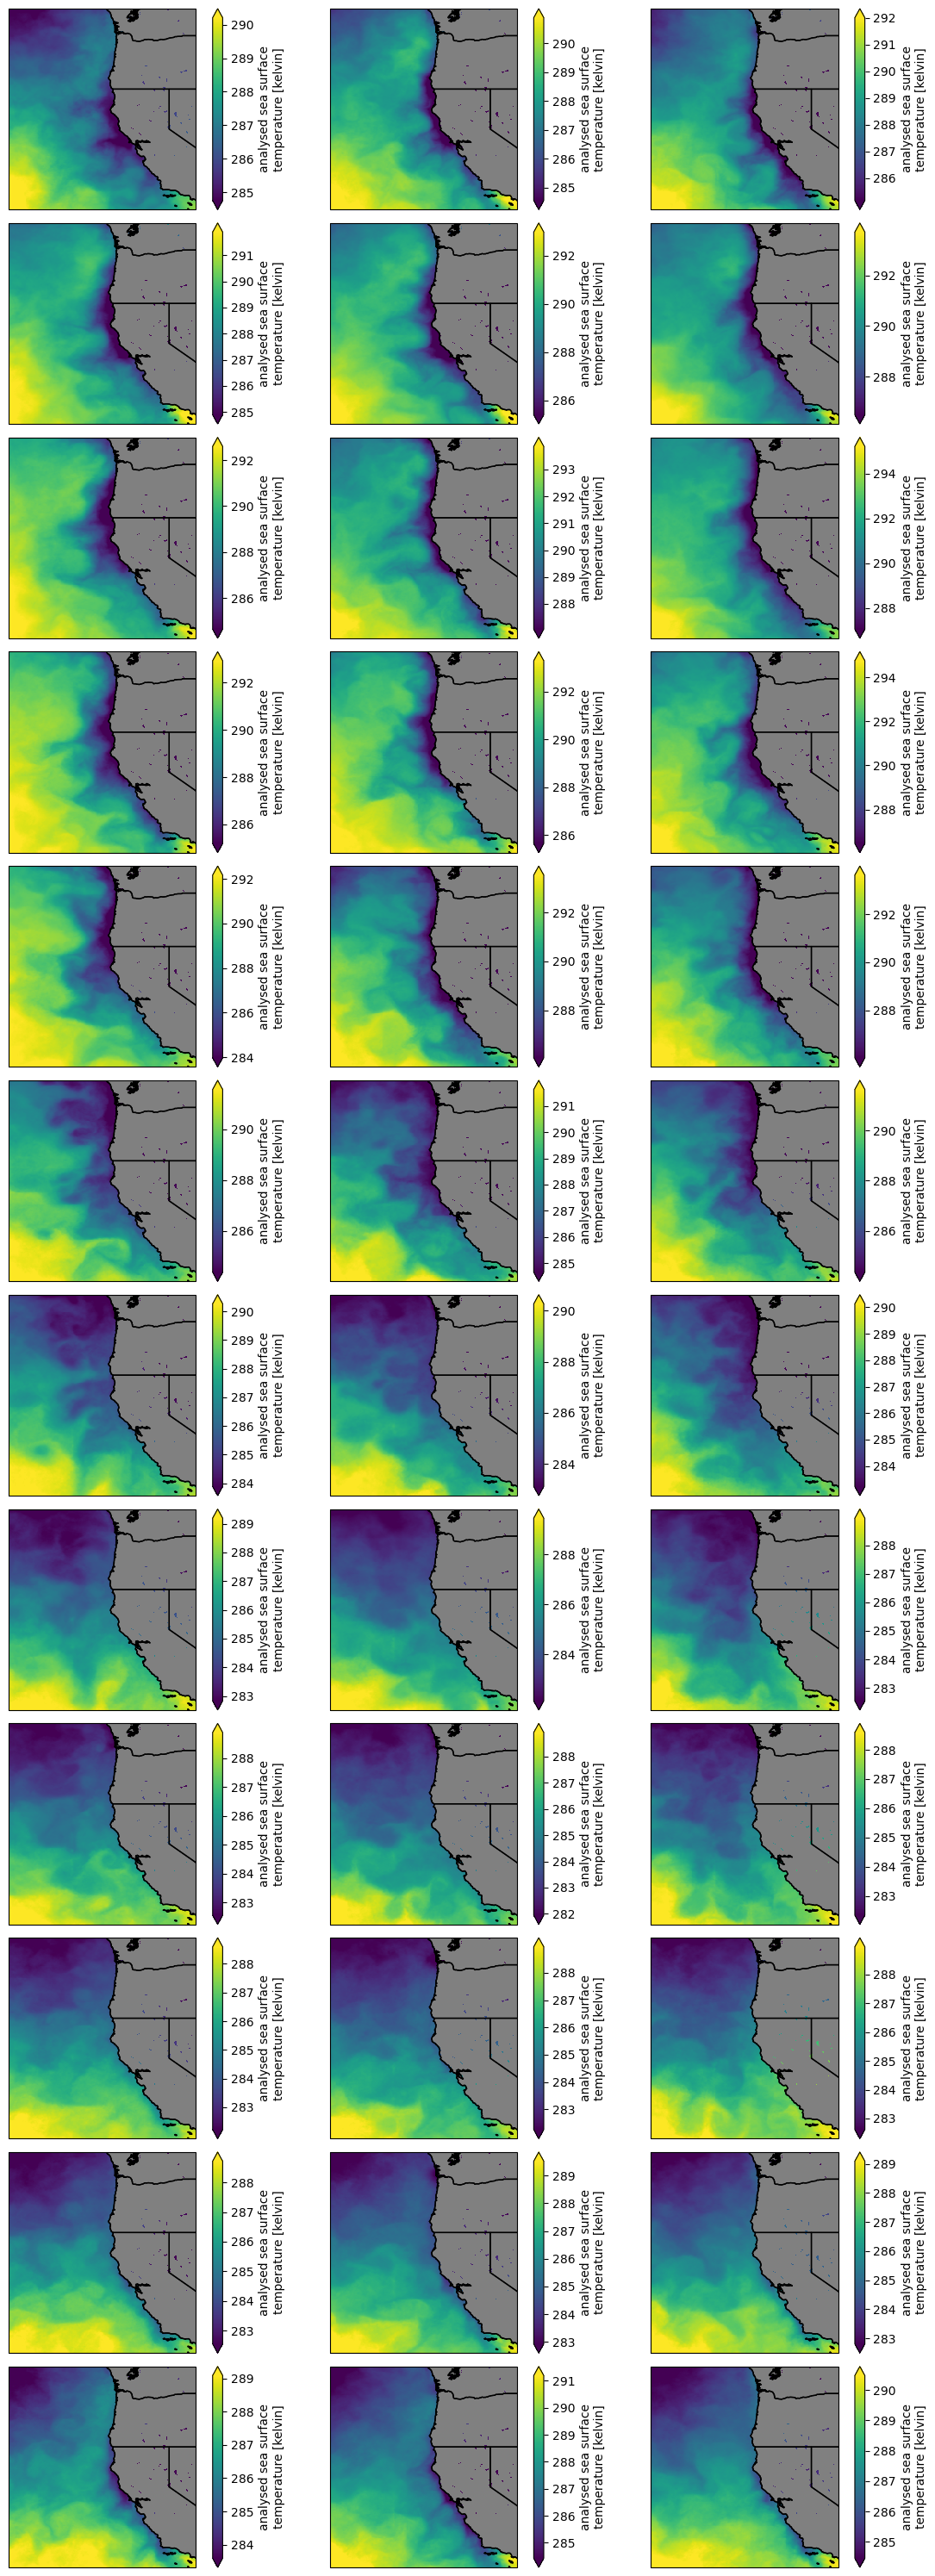

In [5]:
#Question 4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# creating the monthly averages 
monthly_avg = ds.resample(time="1MS").mean()
monthly_data = monthly_avg.isel(time=(monthly_avg['time.year'] > 2013) & (monthly_avg['time.year'] < 2017))

# create the plot with coastlines
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(12, 30), subplot_kw={'projection': crs})
axes = axes.T.flatten()

for i, ax in enumerate(axes):
    monthly_avg.isel(time=i).analysed_sst.plot.imshow(ax=ax, x="lon", y="lat", robust=True)
    ax.set_title("")
    ax.coastlines("10m", color="k")
    ax.add_feature(cfeature.LAND, color="grey")
    ax.add_feature(cfeature.STATES.with_scale("10m"))

plt.tight_layout()
plt.show()


##TO-DO: 
 #standardize sst range for all subplots
 #remove individual color bar and put horizontal colorbar for all 
 #put longitude and latitude